## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
#import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [3]:
df_full = pd.read_csv("data\kc_house_data.csv")
df_CPI =pd.read_csv('./data/CPIAUCSL.csv')

In [4]:
df = df_full[['id', 'sqft_lot', 'sqft_living',
                    'grade', 'condition', 'sqft_basement'
                    , 'bathrooms', 'bedrooms', 'yr_built',
                    'date', 'waterfront', 'view', 'price', 'floors', 'zipcode', 'lat', 'long']]

In [5]:
df_zip = df_full[['zipcode', 'price']]
zipvalues =df_zip.groupby(['zipcode']).mean()
zipvalues = pd.DataFrame(zipvalues)

In [6]:
df_zt = df_full[['id', 'zipcode']]
zip_mult = df_zt.zipcode.replace(df_zip.set_index('zipcode')['price'])


In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

def lot_fix(x):
    if x < np.exp(7.5):
        return 1
    elif x < np.exp(10.25):
        return 2
    elif x < np.exp(12):
        return 3
    else:
        return 4

df['lot_type'] = df['sqft_lot'].apply(lot_fix)

In [8]:
zip_mult

0         572000.0
1         467000.0
2         535000.0
3        1010000.0
4        1220000.0
           ...    
21592     360000.0
21593     400000.0
21594     325000.0
21595     400000.0
21596     325000.0
Name: zipcode, Length: 21597, dtype: float64

In [9]:
df = df.drop('zipcode', 1)
df = pd.concat([df, zip_mult], axis=1)
df = df.rename(columns={'zipcode': 'zip_value'})

<AxesSubplot:xlabel='price', ylabel='Count'>

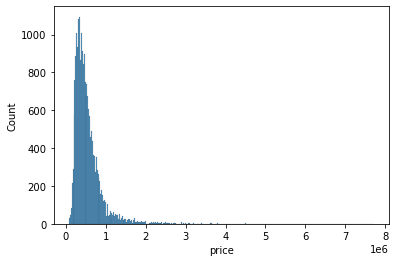

In [10]:
sns.histplot(df.price)

In [11]:
df['lat'] = df['lat'].apply(lambda x: "{:.1f}".format(x)).astype('float64')
df['long'] =df['long'].apply(lambda x: "{:.1f}".format(x)).astype('float64')



In [12]:
locations = df_full[['lat', 'long', 'price']]

In [13]:
dfx = locations[locations['price'] > np.percentile(locations['price'], 99.9)]

<AxesSubplot:xlabel='long', ylabel='lat'>

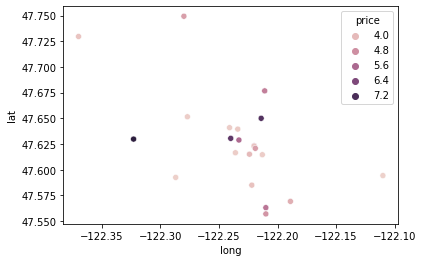

In [14]:
sns.scatterplot(x=dfx['long'], y=dfx['lat'], hue=dfx['price'])

In [15]:
df

id  sqft_lot  sqft_living  grade  condition sqft_basement  \
0      7129300520      5650         1180      7          3           0.0   
1      6414100192      7242         2570      7          3         400.0   
2      5631500400     10000          770      6          3           0.0   
3      2487200875      5000         1960      7          5         910.0   
4      1954400510      8080         1680      8          3           0.0   
...           ...       ...          ...    ...        ...           ...   
21592   263000018      1131         1530      8          3           0.0   
21593  6600060120      5813         2310      8          3           0.0   
21594  1523300141      1350         1020      7          3           0.0   
21595   291310100      2388         1600      8          3           0.0   
21596  1523300157      1076         1020      7          3           0.0   

       bathrooms  bedrooms  yr_built        date  waterfront  view     price  \
0           1.00         3      1955  10/13/2014         NaN   0.0  221900.0   
1           2.25         3      1951   12/9/2014         0.0   0.0  538000.0   
2           1.00         2      1933   2/25/2015         0.0   0.0  180000.0   
3           3.00         4      1965   12/9/2014         0.0   0.0  604000.0   
4           2.00         3      1987   2/18/2015         0.0   0.0  510000.0   
...          ...       ...       ...         ...         ...   ...       ...   
21592       2.50         3      2009   5/21/2014         0.0   0.0  360000.0   
21593       2.50         4      2014   2/23/2015         0.0   0.0  400000.0   
21594       0.75         2      2009   6/23/2014         0.0   0.0  402101.0   
21595       2.50         3      2004   1/16/2015         NaN   0.0  400000.0   
21596       0.75         2      2008  10/15/2014         0.0   0.0  325000.0   

       floors   lat   long  zip_value  
0         1.0  47.5 -122.3   572000.0  
1         2.0  47.7 -122.3   467000.0  
2         1.0  47.7 -122.2   535000.0  
3         1.0  47.5 -122.4  1010000.0  
4         1.0  47.6 -122.0  1220000.0  
...       ...   ...    ...        ...  
21592     3.0  47.7 -122.3   360000.0  
21593     2.0  47.5 -122.4   400000.0  
21594     2.0  47.6 -122.3   325000.0  
21595     2.0  47.5 -122.1   400000.0  
21596     2.0  47.6 -122.3   325000.0  

[21597 rows x 17 columns]

In [16]:
df['view'] = df['view'].fillna(0)
df['waterfront'] = df['waterfront'].fillna(0)
df['sqft_basement'] = df['sqft_basement'].replace(to_replace='?', value= 0)

df_loc = df_full[['lat', 'long', 'price']]

fig = px.scatter_mapbox(df_loc, lat='lat', lon='long',          zoom=7, height = 600)

fig.update_layout(mapbox_style='open-street-map')
fig.show()

### row 3910

In [17]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [18]:
df_full['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

pq_10 = np.percentile(df['price'], 10)
pq_25 = np.percentile(df['price'], 25)
pq_50 = np.percentile(df['price'], 50)
pq_80 = np.percentile(df['price'], 80)
pq_90 = np.percentile(df['price'], 90)

def price_cats(x):
    if x < pq_10:
        return 1
    elif x < pq_25:
        return 2
    elif x < pq_50:
        return 3
    elif x <pq_80:
        return 5
    elif x< pq_90:
        return 6
    else:
        return 7

df['price_class'] = df['price'].apply(price_cats)


0-7.5
7.5 - 10.25
10.25 - 12
12+

In [19]:
df.sqft_basement

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: object

In [20]:

df['view'] = df['view'].astype(bool).astype(int)
df['sqft_basement'] = df['sqft_basement'].astype(bool).astype(int)

In [21]:
df.view.value_counts()

0    19485
1     2112
Name: view, dtype: int64

In [22]:
df.date

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object


df['date'] = pd.to_datetime(df['date'], )
df['date'] = df['date'].apply(lambda x: x.strftime('%Y-%m'))

df_CPI['DATE'] = pd.to_datetime(df_CPI['DATE'])
df_CPI['DATE'] = df_CPI['DATE'].apply(lambda x: x.strftime('%Y-%m'))

# Make Multiplier
df_CPI['Multiplier'] = df_CPI['CPIAUCSL'].iloc[-1] / df_CPI['CPIAUCSL']

In [23]:

df1 = df[df['price'] > np.percentile(df['price'], 99)]

In [24]:
df1

id  sqft_lot  sqft_living  grade  condition  sqft_basement  \
21     2524049179     44867         3050      9          3              1   
153    7855801670     19850         5180     12          3              1   
246    2025069065      8354         3650      9          3              1   
269    7960900060     20100         5050     11          3              1   
282    7424700045      8480         3830      9          5              1   
...           ...       ...          ...    ...        ...            ...   
21352  9533100285      7965         4350     10          3              1   
21451  2311400056      8960         5230     11          3              1   
21490  2524069097    130017         7270     12          3              1   
21514  8964800330     14823         5090     11          3              1   
21560  9253900271     10584         4850     10          3              1   

       bathrooms  bedrooms  yr_built       date  waterfront  view      price  \
21          2.75         3      1968  8/26/2014         0.0     1  2000000.0   
153         3.25         4      2006   4/1/2015         0.0     1  2250000.0   
246         2.50         4      2000  9/29/2014         1.0     1  2400000.0   
269         3.25         4      1982   5/4/2015         0.0     1  2900000.0   
282         3.00         5      1905  5/13/2015         0.0     1  2050000.0   
...          ...       ...       ...        ...         ...   ...        ...   
21352       3.75         4      2013  6/30/2014         0.0     0  2070000.0   
21451       3.50         5      2014  12/1/2014         0.0     0  1990000.0   
21490       6.50         5      2010   5/9/2014         0.0     0  2240000.0   
21514       3.75         4      2013   4/7/2015         0.0     0  3000000.0   
21560       4.50         5      2007   1/7/2015         1.0     1  3570000.0   

       floors   lat   long  zip_value  
21        1.0  47.5 -122.2  1580000.0  
153       2.0  47.6 -122.2  1880000.0  
246       1.0  47.6 -122.1  1220000.0  
269       1.5  47.6 -122.2  1540000.0  
282       2.0  47.6 -122.3   747450.0  
...       ...   ...    ...        ...  
21352     2.0  47.6 -122.2  1540000.0  
21451     2.0  47.6 -122.2  1540000.0  
21490     2.0  47.5 -122.0   400000.0  
21514     1.0  47.6 -122.2  1540000.0  
21560     2.0  47.6 -122.1  3570000.0  

[214 rows x 17 columns]

df = pd.merge(df, df_CPI,left_on='date', right_on='DATE', how='left')

df['price_adj'] = df['price'] * df['Multiplier']

df['Multiplier'].isna().any()

In [25]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

def bed_cat(x):
    if x <=2:
        return 12
    if x <= 3:
        return 3
    if x <=4:
        return 4
    if x <= 6:
        return 56
    else:
        return 77

df['bedrooms'] = df['bedrooms'].apply(bed_cat)

df.bathrooms = df.bathrooms.round()

df.bathrooms.value_counts()

def bath_fix(x):
    if x >= 5:
        return 55
    elif x == 0:
        return 1
    else:
        return x

df['bathrooms'] = df['bathrooms'].apply(bath_fix)

In [26]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [27]:
df.grade.value_counts(normalize=True)

7     0.415521
8     0.280826
9     0.121082
6     0.094365
10    0.052507
11    0.018475
5     0.011205
12    0.004121
4     0.001250
13    0.000602
3     0.000046
Name: grade, dtype: float64

In [28]:
df.grade = df.grade.apply(lambda x: x-3)

In [29]:
def gr_fix(x):
    if x < 5:
        return 1
    elif x < 8:
        return 2
    elif x <10:
        return 3
    else:
        return 4

In [30]:
df['grade'] = df['grade'].apply(gr_fix)

In [31]:
df.grade

0        1
1        1
2        1
3        1
4        2
        ..
21592    2
21593    2
21594    1
21595    2
21596    1
Name: grade, Length: 21597, dtype: int64

In [32]:
df_clean = df
realprice = pd.DataFrame.copy(df['price'])

In [33]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

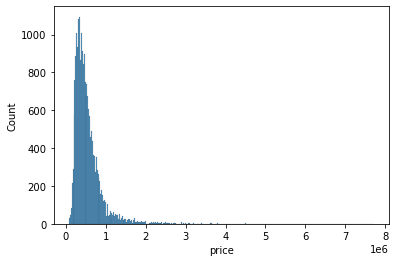

In [34]:
sns.histplot(df['price'])

In [35]:
df[['sqft_lot', 'sqft_living', 'zip_value', 'bedrooms', 'bathrooms']] = np.log(df[['sqft_lot', 'sqft_living', 'zip_value', 'bedrooms', 'bathrooms']])

#df['sqft_lot'] = np.log(df['sqft_lot'])
#df['sqft_living'] = np.log(df['sqft_living'])
#df['price'] = np.log(df['price'])

In [36]:
df.grade

0        1
1        1
2        1
3        1
4        2
        ..
21592    2
21593    2
21594    1
21595    2
21596    1
Name: grade, Length: 21597, dtype: int64

In [37]:
#zip_dummies = pd.get_dummies(df['zipcode'], prefix='zipcode', drop_first=True)
#pc_dummies = pd.get_dummies(df['price_class'], prefix='price_class', drop_first=True)
grade_dummies = pd.get_dummies(df['grade'], prefix='grade', drop_first=True)
cond_dummies = pd.get_dummies(df['condition'], prefix='cond', drop_first=True)
# = pd.get_dummies(df['lot_type'], prefix ='lot_size' , drop_first= True)   
#view_dummies =pd.get_dummies(df['view'], prefix ='view' , drop_first= True)
#bed_dummies =  pd.get_dummies(df['bedrooms'], prefix='bed', drop_first=True)
#bath_dummies =  pd.get_dummies(df['bathrooms'], prefix='bath', drop_first=True)

df = df.drop([ 'grade', 'condition'], axis=1)



df = pd.concat([df, grade_dummies, cond_dummies], axis=1)


In [38]:
df.head(20)

id   sqft_lot  sqft_living  sqft_basement  bathrooms  bedrooms  \
0   7129300520   8.639411     7.073270              1   0.000000  1.098612   
1   6414100192   8.887653     7.851661              1   0.810930  1.098612   
2   5631500400   9.210340     6.646391              1   0.000000  0.693147   
3   2487200875   8.517193     7.580700              1   1.098612  1.386294   
4   1954400510   8.997147     7.426549              1   0.693147  1.098612   
5   7237550310  11.532042     8.597851              1   1.504077  1.386294   
6   1321400060   8.827468     7.447168              0   0.810930  1.098612   
7   2008000270   9.181015     6.966024              1   0.405465  1.098612   
8   2414600126   8.918650     7.484369              1   0.000000  1.098612   
9   3793500160   8.788746     7.544332              1   0.916291  1.098612   
10  1736800520   9.189729     8.177516              1   0.916291  1.098612   
11  9212900260   8.699515     7.056175              1   0.000000  0.693147   
12   114101516   9.898525     7.265430              1   0.000000  1.098612   
13  6054650070   9.177817     7.222566              1   0.559616  1.098612   
14  1175000570   8.486734     7.501082              1   0.693147  1.609438   
15  9297300055   8.517193     7.989560              1   1.098612  1.386294   
16  1875500060   9.549666     7.544332              1   0.693147  1.098612   
17  6865200140   8.366370     7.377759              1   0.000000  1.386294   
18    16000397   9.195227     7.090077              0   0.000000  0.693147   
19  7983200060   9.187481     7.130899              1   0.000000  1.098612   

    yr_built        date  waterfront  view  ...   lat   long  zip_value  \
0       1955  10/13/2014         0.0     0  ...  47.5 -122.3  13.256894   
1       1951   12/9/2014         0.0     0  ...  47.7 -122.3  13.054085   
2       1933   2/25/2015         0.0     0  ...  47.7 -122.2  13.190022   
3       1965   12/9/2014         0.0     0  ...  47.5 -122.4  13.825461   
4       1987   2/18/2015         0.0     0  ...  47.6 -122.0  14.014361   
5       2001   5/12/2014         0.0     0  ...  47.7 -122.0  13.604790   
6       1995   6/27/2014         0.0     0  ...  47.3 -122.3  12.717368   
7       1963   1/15/2015         0.0     0  ...  47.4 -122.3  12.868761   
8       1960   4/15/2015         0.0     0  ...  47.5 -122.3  12.899220   
9       2003   3/12/2015         0.0     0  ...  47.4 -122.0  12.758520   
10      1965    4/3/2015         0.0     0  ...  47.6 -122.1  13.892472   
11      1942   5/27/2014         0.0     0  ...  47.7 -122.3  12.994530   
12      1927   5/28/2014         0.0     0  ...  47.8 -122.2  13.190022   
13      1977   10/7/2014         0.0     0  ...  47.6 -122.0  14.014361   
14      1900   3/12/2015         0.0     0  ...  47.7 -122.4  13.132314   
15      1979   1/24/2015         0.0     1  ...  47.6 -122.4  12.697715   
16      1994   7/31/2014         0.0     0  ...  47.7 -122.0  13.189929   
17      1916   5/29/2014         0.0     0  ...  47.7 -122.3  12.793859   
18      1921   12/5/2014         0.0     0  ...  47.3 -122.2  12.724569   
19      1969   4/24/2015         0.0     0  ...  47.3 -122.3  12.717368   

    grade_2  grade_3  grade_4  cond_2  cond_3  cond_4  cond_5  
0         0        0        0       0       1       0       0  
1         0        0        0       0       1       0       0  
2         0        0        0       0       1       0       0  
3         0        0        0       0       0       0       1  
4         1        0        0       0       1       0       0  
5         0        1        0       0       1       0       0  
6         0        0        0       0       1       0       0  
7         0        0        0       0       1       0       0  
8         0        0        0       0       1       0       0  
9         0        0        0       0       1       0       0  
10        1        0        0       0       1       0       0  
11        0        0        0

In [39]:
df = df.drop(['id', 'date'], axis= 1)

In [40]:
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [sqft_lot, sqft_living, sqft_basement, bathrooms, bedrooms, yr_built, waterfront, view, price, floors, lat, long, zip_value, grade_2, grade_3, grade_4, cond_2, cond_3, cond_4, cond_5]
Index: []

In [41]:
price_log = np.log(df.price)
price_log = pd.DataFrame(price_log)

In [42]:
df.sqft_basement.describe()

count    21597.000000
mean         0.978979
std          0.143459
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: sqft_basement, dtype: float64

In [43]:
scaler = StandardScaler()
scalerp = StandardScaler()
df[['sqft_living', 'sqft_lot', 'lat', 'long', 'zip_value', 'floors', 'yr_built', 'bedrooms', 'bathrooms']] = scaler.fit_transform(df[['sqft_living', 'sqft_lot', 'lat', 'long', 'zip_value', 'floors', 'yr_built', 'bedrooms', 'bathrooms']])

df['price'] = scalerp.fit_transform(price_log)


In [44]:
scalerp

StandardScaler()

In [45]:
df.waterfront = df.waterfront.fillna(0)

df = df.drop('DATE', 1)

In [46]:
df

sqft_lot  sqft_living  sqft_basement  bathrooms  bedrooms  yr_built  \
0     -0.388439    -1.125582              1  -1.726549 -0.279725 -0.544678   
1     -0.113243     0.709463              1   0.339661 -0.279725 -0.680850   
2      0.244481    -2.131943              1  -1.726549 -1.711651 -1.293626   
3     -0.523926     0.070676              1   1.072660  0.736243 -0.204247   
4      0.008140    -0.292732              1   0.039555 -0.279725  0.544700   
...         ...          ...            ...        ...       ...       ...   
21592 -2.171645    -0.513218              1   0.608114 -0.279725  1.293648   
21593 -0.356909     0.458017              1   0.608114  0.736243  1.463863   
21594 -1.975424    -1.469095              1  -2.459548 -1.711651  1.293648   
21595 -1.343145    -0.407754              1   0.608114 -0.279725  1.123432   
21596 -2.226909    -1.469095              1  -2.459548 -1.711651  1.259605   

       waterfront  view     price    floors       lat      long  zip_value  \
0             0.0     0 -1.402030 -0.915552 -0.432021 -0.578014   0.036128   
1             0.0     0  0.279945  0.937431  0.987044 -0.578014  -0.340662   
2             0.0     0 -1.799472 -0.915552  0.987044  0.111104  -0.088111   
3             0.0     0  0.499710 -0.915552 -0.432021 -1.267131   1.092438   
4             0.0     0  0.178438 -0.915552  0.277512  1.489338   1.443386   
...           ...   ...       ...       ...       ...       ...        ...   
21592         0.0     0 -0.483060  2.790414  0.987044 -0.578014  -0.824120   
21593         0.0     0 -0.282961  0.937431 -0.432021 -1.267131  -0.628377   
21594         0.0     0 -0.273012  0.937431  0.277512 -0.578014  -1.014139   
21595         0.0     0 -0.282961  0.937431 -0.432021  0.800221  -0.628377   
21596         0.0     0 -0.677306  0.937431  0.277512 -0.578014  -1.014139   

       grade_2  grade_3  grade_4  cond_2  cond_3  cond_4  cond_5  
0            0        0        0       0       1       0       0  
1            0        0        0       0       1       0       0  
2            0        0        0       0       1       0       0  
3            0        0        0       0       0       0       1  
4            1        0        0       0       1       0       0  
...        ...      ...      ...     ...     ...     ...     ...  
21592        1        0        0       0       1       0       0  
21593        1        0        0       0       1       0       0  
21594        0        0        0       0       1       0       0  
21595        1        0        0       0       1       0       0  
21596        0        0        0       0       1       0       0  

[21597 rows x 20 columns]

In [47]:
X = df.drop('price', 1)
y =df['price']

In [48]:
df.lat

0       -0.432021
1        0.987044
2        0.987044
3       -0.432021
4        0.277512
           ...   
21592    0.987044
21593   -0.432021
21594    0.277512
21595   -0.432021
21596    0.277512
Name: lat, Length: 21597, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

cond_3         sqft_basement    0.000257
grade_2        prest_lt         0.000322
sqft_basement  view             0.000557
               cond_2           0.001042
               grade_2          0.001786
                                  ...   
sqft_living    prest_lv         0.581354
               bedrooms         0.616354
bathrooms      sqft_living      0.762086
cond_3         cond_4           0.814471
sqft_lot       sqft_lot         1.000000
Length: 211, dtype: float64


In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17277 entries, 15615 to 10137
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_lot       17277 non-null  float64
 1   sqft_living    17277 non-null  float64
 2   sqft_basement  17277 non-null  int32  
 3   bathrooms      17277 non-null  float64
 4   bedrooms       17277 non-null  float64
 5   yr_built       17277 non-null  float64
 6   waterfront     17277 non-null  float64
 7   view           17277 non-null  int32  
 8   floors         17277 non-null  float64
 9   lat            17277 non-null  float64
 10  long           17277 non-null  float64
 11  zip_value      17277 non-null  float64
 12  grade_2        17277 non-null  uint8  
 13  grade_3        17277 non-null  uint8  
 14  grade_4        17277 non-null  uint8  
 15  cond_2         17277 non-null  uint8  
 16  cond_3         17277 non-null  uint8  
 17  cond_4         17277 non-null  uint8  
 18  co

In [51]:
predictors = sm.add_constant(X_train)
model_1 = sm.OLS(y_train , predictors).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     2772.
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:12:00   Log-Likelihood:                -12446.
No. Observations:               17277   AIC:                         2.493e+04
Df Residuals:                   17257   BIC:                         2.509e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8142      0.107     -7.577      0.000      -1.025      -0.604
sqft_lot         -0.0039      0.005     -0.790      0.430      -0.013       0.006
sqft_living       0.4792      0.008     60.970      0.000       0.464       0.495
sqft_basement    -0.0263      0.026     -0.999      0.318      -0.078       0.025
bathrooms         0.0751      0.007     10.923      0.000       0.062       0.089
bedrooms         -0.0867      0.005    -16.825      0.000      -0.097      -0.077
yr_built         -0.1822      0.006    -32.893      0.000      -0.193      -0.171
waterfront        0.8608      0.048     18.100      0.000       0.768       0.954
view              0.3529      0.014     25.177      0.000       0.325       0.380
floors            0.0973      0.005     19.011      0.000       0.087       0.107
lat               0.2982      0.004     69.790      0.000       0.290       0.307
long             -0.0546      0.005    -11.302      0.000      -0.064      -0.045
zip_value         0.1987      0.004     44.543      0.000       0.190       0.207
grade_2           0.3665      0.010     35.147      0.000       0.346       0.387
grade_3           1.0629      0.030     35.697      0.000       1.005       1.121
grade_4           2.0130      0.159     12.674      0.000       1.702       2.324
cond_2            0.2795      0.113      2.483      0.013       0.059       0.500
cond_3            0.5893      0.104      5.655      0.000       0.385       0.794
cond_4            0.6331      0.104      6.076      0.000       0.429       0.837
cond_5            0.7526      0.105      7.178      0.000       0.547       0.958
==============================================================================
Omnibus:                      313.277   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              546.499
Skew:                           0.145   Prob(JB):                    2.13e-119
Kurtosis:                       3.822   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
df2 = df.drop(['sqft_lot', 'sqft_basement', 'yr_built', 'bedrooms', 'bathrooms', 'floors'], 1)


In [53]:
X2 = df2.drop('price', 1)
y2 =df2['price']

In [54]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=11)

In [55]:
predictors = sm.add_constant(X_train2)
model_2 = sm.OLS(y_train2 , predictors).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     3616.
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:12:00   Log-Likelihood:                -13179.
No. Observations:               17277   AIC:                         2.639e+04
Df Residuals:                   17263   BIC:                         2.649e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7164      0.108     -6.605      0.000      -0.929      -0.504
sqft_living     0.4559      0.005     85.555      0.000       0.445       0.466
waterfront      0.9322      0.049     18.850      0.000       0.835       1.029
view            0.4054      0.014     28.090      0.000       0.377       0.434
lat             0.3337      0.004     77.459      0.000       0.325       0.342
long           -0.0954      0.004    -21.214      0.000      -0.104      -0.087
zip_value       0.1833      0.005     39.795      0.000       0.174       0.192
grade_2         0.3810      0.010     37.949      0.000       0.361       0.401
grade_3         1.1229      0.030     37.117      0.000       1.064       1.182
grade_4         2.1471      0.165     12.975      0.000       1.823       2.472
cond_2          0.1878      0.117      1.600      0.110      -0.042       0.418
cond_3          0.4355      0.108      4.014      0.000       0.223       0.648
cond_4          0.5113      0.109      4.708      0.000       0.298       0.724
cond_5          0.6961      0.109      6.370      0.000       0.482       0.910
==============================================================================
Omnibus:                      351.047   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.313
Skew:                           0.256   Prob(JB):                    7.46e-103
Kurtosis:                       3.625   Cond. No.                         83.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='price', ylabel='Count'>

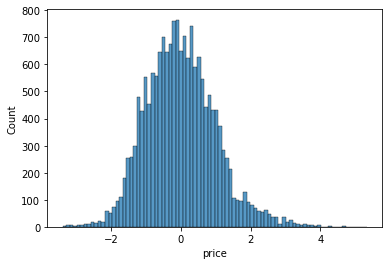

In [56]:
sns.histplot(y_train)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_1= LinearRegression()
model_1.fit(X_train, y_train)

# make predictions
y_hat = model_1.predict(X_train)



In [58]:
model_2= LinearRegression()
model_2.fit(X_train2, y_train2)

# make predictions
y_hat2 = model_2.predict(X2)

In [59]:
features = X_train
label = y_train

In [60]:


scores = cross_val_score(
            model_1, 
            features,
            label,
            cv=8,
            scoring="neg_mean_squared_error")



rmse_scores = np.sqrt(-scores)
display(rmse_scores.mean())
display(rmse_scores.std())

0.49813082888388144

0.00901062488321432

In [61]:


scores2 = cross_val_score(
            model_1, 
            X_test,
            y_test,
            cv=8,
            scoring="neg_mean_squared_error"
)

rmse_scores2 = np.sqrt(-scores2)

display(rmse_scores2.mean())
display(rmse_scores2.std())

0.49188050535469363

0.009673003093285911

In [62]:
scores2

array([-0.23953747, -0.22873467, -0.23546892, -0.23470295, -0.23695406,
       -0.25173811, -0.25718054, -0.25200326])

In [63]:
df = pd.DataFrame(df)

In [64]:
df

sqft_lot  sqft_living  sqft_basement  bathrooms  bedrooms  yr_built  \
0     -0.388439    -1.125582              1  -1.726549 -0.279725 -0.544678   
1     -0.113243     0.709463              1   0.339661 -0.279725 -0.680850   
2      0.244481    -2.131943              1  -1.726549 -1.711651 -1.293626   
3     -0.523926     0.070676              1   1.072660  0.736243 -0.204247   
4      0.008140    -0.292732              1   0.039555 -0.279725  0.544700   
...         ...          ...            ...        ...       ...       ...   
21592 -2.171645    -0.513218              1   0.608114 -0.279725  1.293648   
21593 -0.356909     0.458017              1   0.608114  0.736243  1.463863   
21594 -1.975424    -1.469095              1  -2.459548 -1.711651  1.293648   
21595 -1.343145    -0.407754              1   0.608114 -0.279725  1.123432   
21596 -2.226909    -1.469095              1  -2.459548 -1.711651  1.259605   

       waterfront  view     price    floors       lat      long  zip_value  \
0             0.0     0 -1.402030 -0.915552 -0.432021 -0.578014   0.036128   
1             0.0     0  0.279945  0.937431  0.987044 -0.578014  -0.340662   
2             0.0     0 -1.799472 -0.915552  0.987044  0.111104  -0.088111   
3             0.0     0  0.499710 -0.915552 -0.432021 -1.267131   1.092438   
4             0.0     0  0.178438 -0.915552  0.277512  1.489338   1.443386   
...           ...   ...       ...       ...       ...       ...        ...   
21592         0.0     0 -0.483060  2.790414  0.987044 -0.578014  -0.824120   
21593         0.0     0 -0.282961  0.937431 -0.432021 -1.267131  -0.628377   
21594         0.0     0 -0.273012  0.937431  0.277512 -0.578014  -1.014139   
21595         0.0     0 -0.282961  0.937431 -0.432021  0.800221  -0.628377   
21596         0.0     0 -0.677306  0.937431  0.277512 -0.578014  -1.014139   

       grade_2  grade_3  grade_4  cond_2  cond_3  cond_4  cond_5  
0            0        0        0       0       1       0       0  
1            0        0        0       0       1       0       0  
2            0        0        0       0       1       0       0  
3            0        0        0       0       0       0       1  
4            1        0        0       0       1       0       0  
...        ...      ...      ...     ...     ...     ...     ...  
21592        1        0        0       0       1       0       0  
21593        1        0        0       0       1       0       0  
21594        0        0        0       0       1       0       0  
21595        1        0        0       0       1       0       0  
21596        0        0        0       0       1       0       0  

[21597 rows x 20 columns]

In [65]:
y_hat = model_2.predict(X2)
sss = y_hat
y_hatty = y_hat

In [66]:
y_hat = scalerp.inverse_transform(y_hat)

y_hat = np.exp(y_hat)
y_hat

array([292654.47649126, 562559.8732075 , 281507.57089733, ...,
       275845.99450477, 371878.69406917, 275845.99450477])

0.6877112969075241

In [67]:
scores3 = cross_val_score(
            model_2, 
            X_train2,
            y_train2,
            cv=8,
            scoring="neg_mean_squared_error"
)

rmse_scores3 = np.sqrt(-scores3)

In [68]:
rmse_scores3.mean()

0.5193376004992963

In [69]:
realprice

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

In [70]:
resids = y_hat - realprice

In [71]:
resids

0         70754.476491
1         24559.873208
2        101507.570897
3        -91186.513875
4           912.297808
             ...      
21592    129292.769231
21593    107889.468955
21594   -126255.005495
21595    -28121.305931
21596    -49154.005495
Name: price, Length: 21597, dtype: float64

In [72]:
print(y_hat[3910])
print(realprice[3910])

4693265.759371643
7060000.0


<AxesSubplot:xlabel='price', ylabel='Count'>

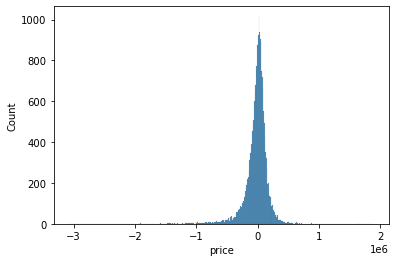

In [73]:
sns.histplot(resids)

In [74]:
resids.describe()

count    2.159700e+04
mean    -2.110341e+04
std      1.981510e+05
min     -3.078970e+06
25%     -7.886179e+04
50%      6.769760e+03
75%      7.180978e+04
max      1.885130e+06
Name: price, dtype: float64

In [75]:
np.sqrt(sum(resids**2))/len(resids)

1355.934921124527

In [76]:
max(realprice) -min(realprice)

7622000.0

In [77]:
sss.shape

(21597,)

In [78]:
resids.sort_values()

7245    -3.078970e+06
1446    -2.823752e+06
8629    -2.686653e+06
3910    -2.366734e+06
10435   -2.184229e+06
             ...     
21034    1.190191e+06
6035     1.480401e+06
15654    1.651941e+06
14542    1.654312e+06
13398    1.885130e+06
Name: price, Length: 21597, dtype: float64

In [79]:
resids.shape

(21597,)

In [80]:
realprice.shape

(21597,)

<AxesSubplot:xlabel='price', ylabel='price'>

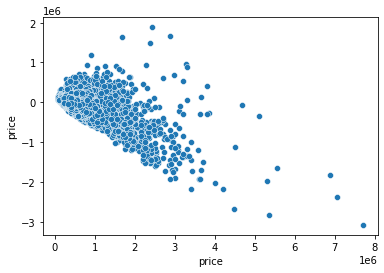

In [81]:
sns.scatterplot(x=realprice, y=resids)

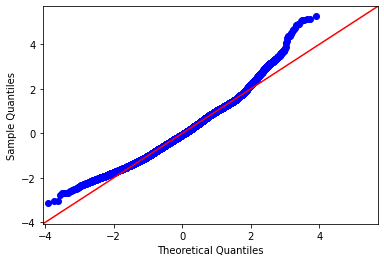

In [82]:
import scipy.stats as stats
fig = sm.graphics.qqplot(y_hatty, dist=stats.norm, line='45', fit=True)


<AxesSubplot:xlabel='price', ylabel='Count'>

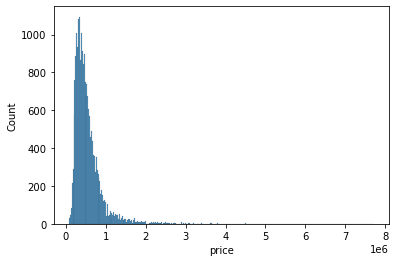

In [83]:
sns.histplot(df_full['price'])

In [84]:
df_full.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21597, dtype: bool

In [85]:


cv_5_results  = np.mean(cross_val_score(model_2, X2, y2, cv=5,  scoring='r2'))
cv_10_results = np.mean(cross_val_score(model_2, X2, y2, cv=10, scoring='r2'))
cv_20_results = np.mean(cross_val_score(model_2, X2, y2, cv=20, scoring='r2'))

In [86]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)


0.7313676416850704
0.7306383451398553
0.7307420411929102
